# Introduction

Since 2008, Airbnb gives guests and hosts a more unique and personalized travel option. Not like the hotel, Airbnb can provide more diversities to guests, which means there are more factors that could potentially affect the price and availability. Airbnb's millions of the listings data can tell us lots of stories. This project is to show an analysis based on the Seattle Airbnb open data. 
We'll answer the following three questions:
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- where are the most expensive places in Seattle?
- What are the most correlated factors that could affect the price?

The following datasets will be used in this analysis.
- Calendar, including listing id and the price and availability for that day
- Listings, including full descriptions and average review score

# Look and Understand the Data

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# read in the datatsets
calendar_df = pd.read_csv('./seattle_airbnb_data/calendar.csv')
listings_df = pd.read_csv('./seattle_airbnb_data/listings.csv')
reviews_df  = pd.read_csv('./seattle_airbnb_data/reviews.csv')

In [2]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
list(listings_df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


# Data Preparation

### 1) Calendar Data

First, check missing values in Calendar data.

In [5]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


The brief info above shows that only "price" column has missing values. Now, confirm that the missing values in "price" column are only for "available = f", i.e. non-available listing.

In [6]:
# get rows with missing price
no_price = calendar_df[pd.isnull(calendar_df["price"])]
# check if any row with available = true
np.sum(no_price["available"]=='t')

0

The above result confirmed that all missing price indicates the non-availabilty, so we can simply impute the missing price as $0. After taking a brief glimpse at the calendar data, the "price" column should be converted to numeric.

In [7]:
# convert the price column from currency string to numeric
calendar_df['price'] = calendar_df['price'].apply(lambda x: x.replace('$', '').replace(',', '') 
                                                  if isinstance(x, str) else x).astype(float)
# impute the missing price as 0
calendar_df['price'].fillna(0, inplace=True)

# convert available to numeric
calendar_df['available'] = calendar_df['available'].apply(lambda x: 1 if x=='t' else 0)

To answer the question "What are the busiest times of the year to visit Seattle", we also need to extract the month and year from "date" column.

In [8]:
calendar_df['month'] = pd.DatetimeIndex(calendar_df['date']).month
calendar_df['year'] = pd.DatetimeIndex(calendar_df['date']).year

In [9]:
calendar_df.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,85.0,1,2016
1,241032,2016-01-05,1,85.0,1,2016
2,241032,2016-01-06,0,0.0,1,2016
3,241032,2016-01-07,0,0.0,1,2016
4,241032,2016-01-08,0,0.0,1,2016


### 2) Listings Data

The listings dataset includes many columns but not all of them will be used in this project. So let's only keep those related and interesting columns.

In [10]:
keep_cols = ['price','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds',
             'amenities','security_deposit','cleaning_fee','minimum_nights','maximum_nights','number_of_reviews',
             'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
             'review_scores_value','review_scores_communication','review_scores_location','instant_bookable','cancellation_policy']
listings_df_sub = listings_df[keep_cols]

In [11]:
listings_df_sub.head()

,price,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_value,review_scores_communication,review_scores_location,instant_bookable,cancellation_policy
0,$85.00,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,...,207,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,moderate
1,$150.00,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$100.00,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
2,$975.00,98119,House,Entire home/apt,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","$1,000.00",...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
3,$100.00,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,$450.00,98119,House,Entire home/apt,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$700.00,...,38,92.0,9.0,9.0,10.0,9.0,10.0,9.0,f,strict


First, check missing values in Listings data.

In [12]:
# check the percentage of missing values in each column
pct_missing_cols = listings_df_sub.isnull().mean() * 100
pct_missing_cols[pct_missing_cols > 0]

zipcode                         0.183342
property_type                   0.026192
bathrooms                       0.419068
bedrooms                        0.157150
beds                            0.026192
security_deposit               51.126244
cleaning_fee                   26.977475
review_scores_rating           16.946045
review_scores_accuracy         17.234154
review_scores_cleanliness      17.103195
review_scores_checkin          17.234154
review_scores_value            17.181771
review_scores_communication    17.050812
review_scores_location         17.155579
dtype: float64

From the above summaries, "security_deposit" has more than 50% missing values. We'll not use this column in later analysis because imputing this column with mean or other way will cause the overfitting. 

In [13]:
# drop the "security_deposit" column
listings_df_sub = listings_df_sub.drop(columns = 'security_deposit')

Drop the rows with missing "zipcode" or "property_type" because those cannot be easily imputed and there are only few missing values there. 

In [14]:
listings_df_sub = listings_df_sub.dropna(subset=['zipcode', 'property_type'])

For other columns, we'll impute the missing values with mode or mean.

In [15]:
# impute the missing values with Mode
mode_fill_cols = ['bathrooms', 'bedrooms', 'beds']
for col in mode_fill_cols:
    listings_df_sub[col].fillna(listings_df_sub[col].mode()[0], inplace=True)

In [16]:
# before imputation, convert price related columns to numeric
listings_df_sub['price'] = listings_df_sub['price'].apply(lambda x: x.replace('$', '').replace(',', '') 
                                                          if isinstance(x, str) else x).astype(float)
listings_df_sub['cleaning_fee'] = listings_df_sub['cleaning_fee'].apply(lambda x: x.replace('$', '').replace(',', '') 
                                                                        if isinstance(x, str) else x).astype(float)

In [17]:
# impute the missing values with Mean
mean_fill_cols = ['cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                  'review_scores_checkin','review_scores_value','review_scores_communication','review_scores_location']
for col in mean_fill_cols:
    listings_df_sub[col].fillna(listings_df_sub[col].mean(), inplace=True)

In [18]:
listings_df_sub.head()

,price,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,cleaning_fee,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_value,review_scores_communication,review_scores_location,instant_bookable,cancellation_policy
0,85.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",61.701401,...,207,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,f,moderate
1,150.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",40.000000,...,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,f,strict
2,975.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",300.000000,...,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,f,strict
3,100.0,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",61.701401,...,0,94.540916,9.636969,9.557138,9.787571,9.452471,9.809554,9.609756,f,flexible
4,450.0,98119,House,Entire home/apt,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",125.000000,...,38,92.000000,9.000000,9.000000,10.000000,9.000000,10.000000,9.000000,f,strict


Now, split category columns (i.e property_type, room_type, amenities) into multiple dummy columns.

In [19]:
# dummy df for property type and room type
property_type_dm = listings_df_sub['property_type'].str.get_dummies(',')
room_type_dm = listings_df_sub['room_type'].str.get_dummies(',')

# remove {} "" from amenities column
amenities_clean = listings_df_sub['amenities'].str.replace('"', '').str.replace('{', '',regex=False).str.replace('}', '',regex=False)
# dummy df for amenities
amenities_dm = amenities_clean.str.get_dummies(',')

# listing df dropping original category columns
listings_df_drop = listings_df_sub.drop(columns = ['property_type', 'room_type', 'amenities'])

# create dummy columns and drop the original category columns
listings_df_dummy = pd.concat([listings_df_drop, property_type_dm, room_type_dm, amenities_dm], axis=1)

In [20]:
listings_df_dummy.columns

Index(['price', 'zipcode', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'cleaning_fee', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_value', 'review_scores_communication',
       'review_scores_location', 'instant_bookable', 'cancellation_policy',
       'Apartment', 'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin',
       'Camper/RV', 'Chalet', 'Condominium', 'Dorm', 'House', 'Loft', 'Other',
       'Tent', 'Townhouse', 'Treehouse', 'Yurt', 'Entire home/apt',
       'Private room', 'Shared room', '24-Hour Check-in', 'Air Conditioning',
       'Breakfast', 'Buzzer/Wireless Intercom', 'Cable TV',
       'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer',
       'Elevator in Building', 'Essentials', 'Family/Kid Friendly',
       'Fire Extinguisher', 'First Aid Kit', 'Free Parking on Premises', 'Gym',
       'Hair 

In [21]:
listings_df_dummy.head()

,price,zipcode,accommodates,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,85.0,98119,4,1.0,1.0,1.0,61.701401,1,365,207,...,0,0,0,0,0,1,1,0,0,1
1,150.0,98119,4,1.0,1.0,1.0,40.000000,2,90,43,...,1,0,1,0,0,1,1,0,0,1
2,975.0,98119,11,4.5,5.0,7.0,300.000000,4,30,20,...,0,1,1,0,0,1,1,0,0,1
3,100.0,98119,3,1.0,0.0,2.0,61.701401,1,1125,0,...,1,1,1,0,0,0,1,0,0,1
4,450.0,98119,6,2.0,3.0,3.0,125.000000,1,1125,38,...,0,1,1,0,0,1,0,0,0,1


# Analysis and Evaluation

Now we have clean calendar and listings data for next steps to answer the three questions we are interested.

### Question 1: What are the busiest times of the year to visit Seattle? By how much do prices spike?

To answer this question, we'll use the Calendar data to look at:
- how many listings / availiabilities / non-availabilities in each month
- how listing prices change among different months in the year

In [22]:
min_date = min(calendar_df['date'])
max_date = max(calendar_df['date'])
print('The earliest date is %s.' % (min_date), 'The latest date is %s.' % (max_date), 
      'The data only includes few days in 2017 January, so only use 2016 data for this question.')

The earliest date is 2016-01-04. The latest date is 2017-01-02. The data only includes few days in 2017 January, so only use 2016 data for this question.


In [23]:
# subset the calendar data to rows for year 2016
calendar_df_sub = calendar_df.loc[calendar_df['year'] == 2016]
# calculate the number of availablities and average price per month
calendar_df_sum = calendar_df_sub[['month','available','price']].groupby(['month']).sum()
calendar_df_sum['average_price'] = calendar_df_sum['price'] / calendar_df_sum['available']
calendar_df_sum.reset_index(inplace=True)
calendar_df_sum

,month,available,price,average_price
0,1,59239,7201591.0,121.568409
1,2,73321,9113355.0,124.293927
2,3,83938,10798161.0,128.644488
3,4,76037,10272371.0,135.097005
4,5,79971,11159008.0,139.538183
5,6,77244,11391415.0,147.473137
6,7,74222,11288732.0,152.094150
7,8,76347,11502179.0,150.656594
8,9,77246,11065949.0,143.255949
9,10,82438,11296639.0,137.031939


Create the plots to show the changes on the availabilites and prices among the months.

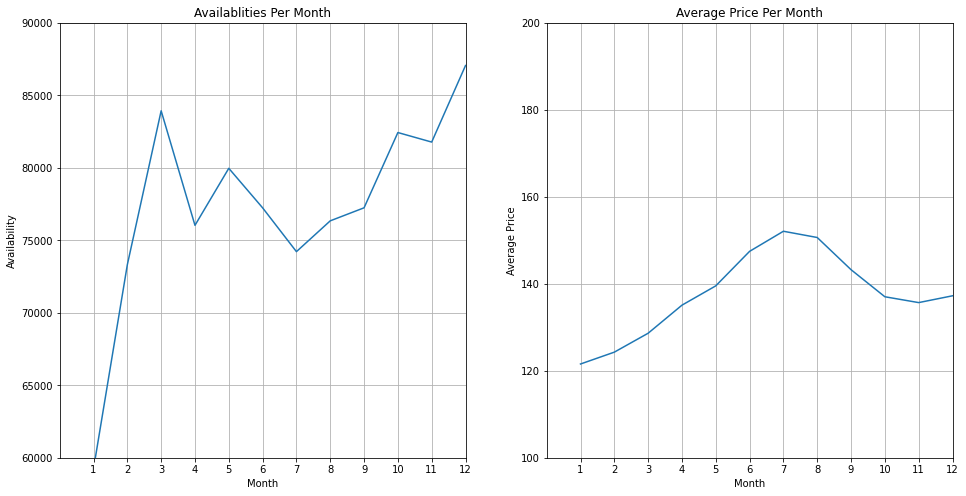

In [24]:
plt.figure(figsize=(16, 8))

x = calendar_df_sum['month']
y1 = calendar_df_sum['available']
y2 = calendar_df_sum['average_price']

plt.subplot(121)
plt.plot(x,y1)
plt.xlabel('Month')
plt.ylabel('Availability')
plt.title('Availablities Per Month')
plt.axis([0, 12, 60000, 90000])
plt.xticks(np.arange(1, 13, step=1))
plt.grid(True)

plt.subplot(122)
plt.plot(x,y2)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price Per Month')
plt.axis([0, 12, 100, 200])
plt.xticks(np.arange(1, 13, step=1))
plt.grid(True)

plt.show()


The above plots show us the January and July have relatively low availabilities, which probably is because of summer break and Chrismas / New Year holiday during the winter. Overall, the busiest time to visit Seattle is summer and winter. The average price on July is the highest in whole year and the price raise again on December. This trend indicates that the price is kind of depending on the availabilites, i.e. less listings on the market will lead to a higher price.

### Question 2: where are the most expensive place in Seattle?

To answer this question, we'll use the Listings data to look at:
- the min / max / average listing price for each zip code in Seattle

In [25]:
listings_df_dummy.head()

,price,zipcode,accommodates,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,85.0,98119,4,1.0,1.0,1.0,61.701401,1,365,207,...,0,0,0,0,0,1,1,0,0,1
1,150.0,98119,4,1.0,1.0,1.0,40.000000,2,90,43,...,1,0,1,0,0,1,1,0,0,1
2,975.0,98119,11,4.5,5.0,7.0,300.000000,4,30,20,...,0,1,1,0,0,1,1,0,0,1
3,100.0,98119,3,1.0,0.0,2.0,61.701401,1,1125,0,...,1,1,1,0,0,0,1,0,0,1
4,450.0,98119,6,2.0,3.0,3.0,125.000000,1,1125,38,...,0,1,1,0,0,1,0,0,0,1


In [30]:
# calculate the total listings per zip code
zipcode_df_cnt = listings_df_dummy['zipcode'].value_counts()
zipcode_df_cnt = zipcode_df_cnt.to_frame().reset_index()
zipcode_df_cnt = zipcode_df_cnt.rename({'index':'zipcode', 'zipcode':'listing_count'}, axis=1)

# calculate the price sum per zip code 
zipcode_df_sum = listings_df_dummy[['price','zipcode']].groupby(['zipcode']).sum()
zipcode_df_sum = zipcode_df_sum.reset_index().rename({'price':'price_sum'}, axis=1)

# calculate the price min per zip code 
zipcode_df_min = listings_df_dummy[['price','zipcode']].groupby(['zipcode']).min()
zipcode_df_min = zipcode_df_min.reset_index().rename({'price':'price_min'}, axis=1)

# calculate the price max per zip code 
zipcode_df_max = listings_df_dummy[['price','zipcode']].groupby(['zipcode']).max()
zipcode_df_max = zipcode_df_max.reset_index().rename({'price':'price_max'}, axis=1)

zipcode_df = zipcode_df_cnt.merge(zipcode_df_sum,on='zipcode').merge(zipcode_df_min,on='zipcode').merge(zipcode_df_max,on='zipcode')
zipcode_df['average_price'] = zipcode_df['price_sum'] / zipcode_df['listing_count']

zipcode_df

,zipcode,listing_count,price_sum,price_min,price_max,average_price
0,98122,420,55647.0,22.0,600.0,132.492857
1,98103,394,48915.0,34.0,680.0,124.149746
2,98102,339,43088.0,39.0,750.0,127.103245
3,98105,225,24100.0,28.0,575.0,107.111111
4,98109,202,30350.0,38.0,775.0,150.247525
5,98101,201,33511.0,38.0,999.0,166.721393
6,98144,200,21079.0,30.0,399.0,105.395000
7,98121,196,30142.0,35.0,899.0,153.785714
8,98107,180,23443.0,25.0,465.0,130.238889
9,98115,178,19959.0,28.0,1000.0,112.129213


Create the plots to show the difference on the prices for each zip code.

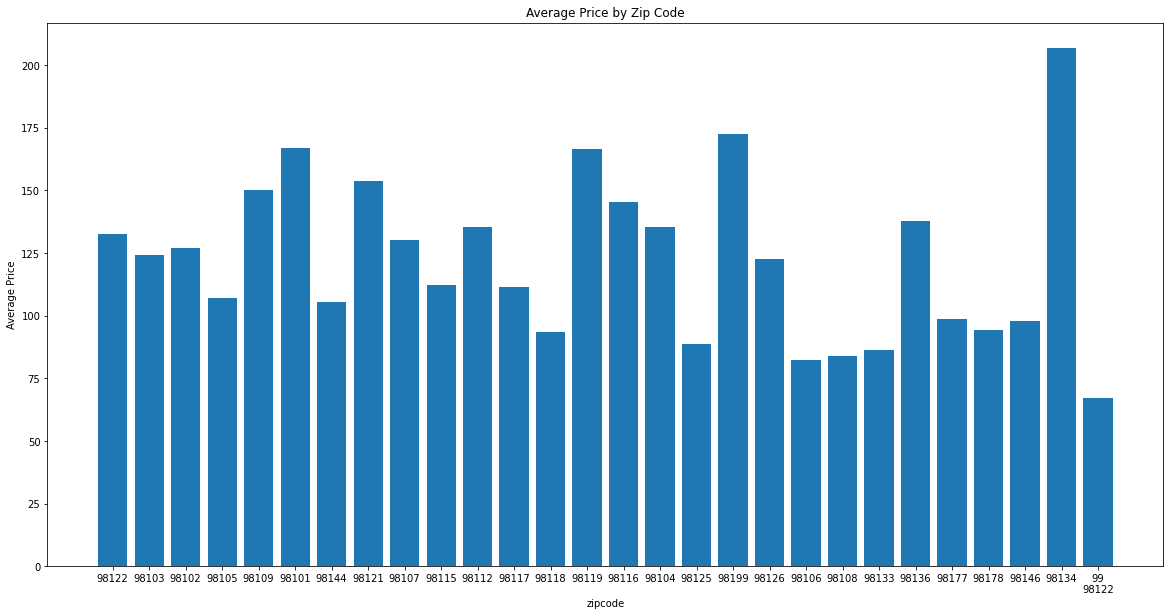

In [32]:
plt.figure(figsize=(20, 10))
x = zipcode_df['zipcode']
y = zipcode_df['average_price']
plt.bar(x,y)
plt.xlabel('zipcode')
plt.ylabel('Average Price')
plt.title('Average Price by Zip Code')
plt.xticks(zipcode_df['zipcode'])
plt.show()

According to the above diagram and summary statistics, zip code 98134 has the highest average price 206. This could because of less listings in this area, but the lowest listing price in this area is 149, which is more than the average listing price of lots of other zip codes. So this area could have few but high-class Airbnb properties. If we are considering in the number of listings, the following zip codes have relatively higher average listing price: 98199, 98119, 98101. 

### Question 3: What are the most correlated factors that could affect the price?

To answer this question, we'll use the listings data to check the correlation between price and other features.

In [33]:
listings_df_dummy.corr()

,price,accommodates,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
price,1.000000,0.651767,0.515314,0.626876,0.588433,5.832615e-01,0.017384,-0.003594,-0.126012,0.050299,...,0.053769,0.031898,0.024101,-0.056972,0.087222,0.205636,0.120613,-0.006585,0.049134,0.027331
accommodates,0.651767,1.000000,0.536791,0.770036,0.861392,5.926011e-01,0.017271,0.003325,-0.076249,-0.011574,...,0.079850,0.068201,0.074260,-0.048097,0.111234,0.246539,0.157770,-0.004037,0.037418,0.051469
bathrooms,0.515314,0.536791,1.000000,0.610041,0.531678,4.706795e-01,0.006496,-0.014991,-0.094244,0.042116,...,0.006563,-0.012168,0.049340,0.003436,0.121558,0.130050,0.142664,-0.010035,-0.041968,0.045549
bedrooms,0.626876,0.770036,0.610041,1.000000,0.752824,5.703560e-01,0.012062,-0.008522,-0.107960,0.020711,...,0.036578,0.004155,0.051553,-0.036852,0.076989,0.184266,0.171858,0.005022,-0.042063,0.044765
beds,0.588433,0.861392,0.531678,0.752824,1.000000,5.707084e-01,0.002717,-0.009270,-0.090357,-0.000597,...,0.069371,0.029951,0.061876,-0.036011,0.111643,0.180405,0.145012,-0.004730,-0.002182,0.049606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TV,0.205636,0.246539,0.130050,0.184266,0.180405,1.642685e-01,-0.020999,0.004601,-0.023210,0.068984,...,0.053700,0.130440,0.126677,-0.045010,0.007699,1.000000,0.161531,-0.008508,0.091050,0.157214
Washer,0.120613,0.157770,0.142664,0.171858,0.145012,1.324561e-01,0.017642,0.020648,-0.142703,0.002280,...,0.059801,0.085360,0.098095,0.033147,0.053630,0.161531,1.000000,0.012030,0.087152,0.141825
Washer / Dryer,-0.006585,-0.004037,-0.010035,0.005022,-0.004730,1.865856e-17,0.000181,-0.003174,0.005945,-0.025760,...,-0.011119,-0.035029,-0.056702,-0.003378,-0.005521,-0.008508,0.012030,1.000000,-0.006700,0.004656
Wheelchair Accessible,0.049134,0.037418,-0.041968,-0.042063,-0.002182,1.444657e-02,-0.001214,-0.012675,-0.021734,-0.008962,...,0.086436,0.078535,0.039623,0.031225,0.100761,0.091050,0.087152,-0.006700,1.000000,0.019430


we can see that there are too many factors in the dataset right now because we converted the categorical columns into multiple dummy columns. so let's focus on the more correlated factors.

In [34]:
corr = listings_df_dummy.corr()
corr_price = corr['price']

print('Correlation between price and other variables:')
corr_price.loc[abs(corr_price) >= 0.5].sort_values(ascending=False)

Correlation between price and other variables:


price           1.000000
accommodates    0.651767
bedrooms        0.626876
beds            0.588433
cleaning_fee    0.583261
bathrooms       0.515314
Name: price, dtype: float64

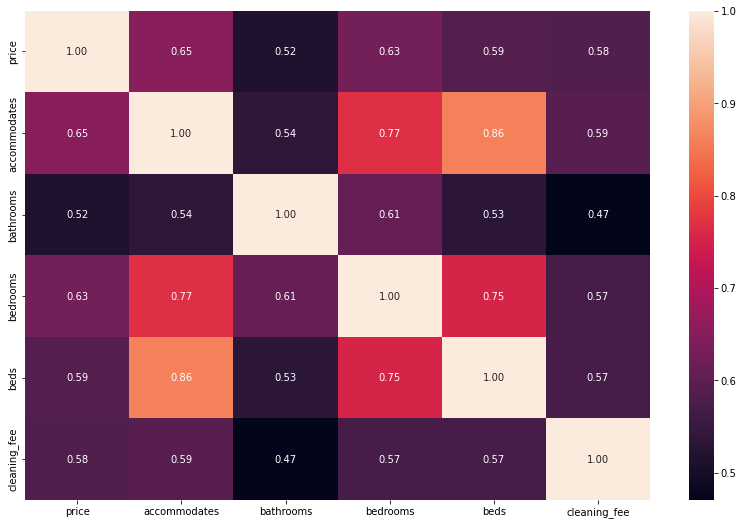

In [35]:
listings_df_map = listings_df_dummy[['price','accommodates','bathrooms','bedrooms','beds','cleaning_fee']]
plt.figure(figsize=(14,9))
sns.heatmap(listings_df_map.corr(), annot=True, fmt=".2f");

From the above correlation results, accommodate is the most correlated factor that would affect the price. Similarly, the number of bedrooms / beds / bathrooms are also high correlated with the price, which makes sense that more accomodate or more rooms/beds will lead to a higher listing price. Besides that, more cleaning fee will also cause a higher listing price. 

# Conclusion

- The busiest time to visit Seattle would be during the school summer break and aroung Chrismas / New Year holiday during winter. The price during these periods is higher than other time during the year, especially high during summer time.
- Zip code 98134 has the highest average listing price in Seattle, although probably because of less listings in this area. Ohter than that, the areas 98199, 98119 and 98101 also have relatively higher average price.
- Accommodate is the most correlated factor that could affect the listing price. More accomodate means higher price. Besides of the number of rooms / beds, cleaning fee is also a major factor that could affect the price.